# Downloading vectorial annotations from <i>FIIND</i> on MicroDraw

This notebook will show you how to query the MicroDraw API, find the histological data included in the <i>FIIND</i> project and the available annotations, and download your vectorial annotations for each slice to a `.json` file or an `svg`.

## 1. The project on MicroDraw

The project URL is [https://microdraw.pasteur.fr/project/FIIND](https://microdraw.pasteur.fr/project/FIIND)

The project includes 20 histological datasets across 5 different time points of ferret development: P0, P4, P8, P16, and P32; and 2 different stainings: Nissl and NeuN. These histological datasets have some vectorial annotations: Annotations of the pial surface, grey-white boundary, and subcortical regions were manually drawn and labelled for the ferret brains at P4, P8, P16 and P32. They are automatically loaded on project display.

To have easy access to MicroDraw functionalities, download the repo https://github.com/neuroanatomy/microdraw.py, and copy the script `microdraw.py` into the folder where your notebook is stored.

## 2. Imports

In [42]:
import urllib.request as urlreq
from urllib.request import urlopen
import re
import os
import json
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from skimage.draw import polygon, polygon_perimeter
import nibabel as nib
import microdraw as mic

## 3. Configuration

In [43]:
# Project name
project = 'FIIND'

# empty token (not needed for an open project)
token = ''

# Local directory for saving the annotations
RAWSEG_DIR = './data-fiind-microdraw/'

## 4. Get information

In [44]:
# Create local download directory if it doesn't exist
if not os.path.exists(RAWSEG_DIR):
    os.makedirs(RAWSEG_DIR)
    
# Project URL
url = "http://microdraw.pasteur.fr/project/json/" + project + "/"

# Download project description
res = urlreq.urlopen( url )
txt = res.read()
prj = json.loads( txt )

# Get number of files
nfiles = len( prj['files']['list'] )
print("Annotations for %s files will be downloaded"%(nfiles))

Annotations for 11 files will be downloaded


In [45]:
# You can check the files if you like with the following line of code
#print ( prj['files']['list'] )

## 5. Downloading annotations

In [46]:
source = "https://microdraw.pasteur.fr/F107_P4/F107_P4.json"
p4_slices = mic.download_all_regions_from_dataset(source, project, token)

100%|██████████| 89/89 [00:07<00:00, 11.15it/s]


In [47]:
# Save contours
mic.save_dataset(p4_slices, RAWSEG_DIR + "/p4_slices.json")

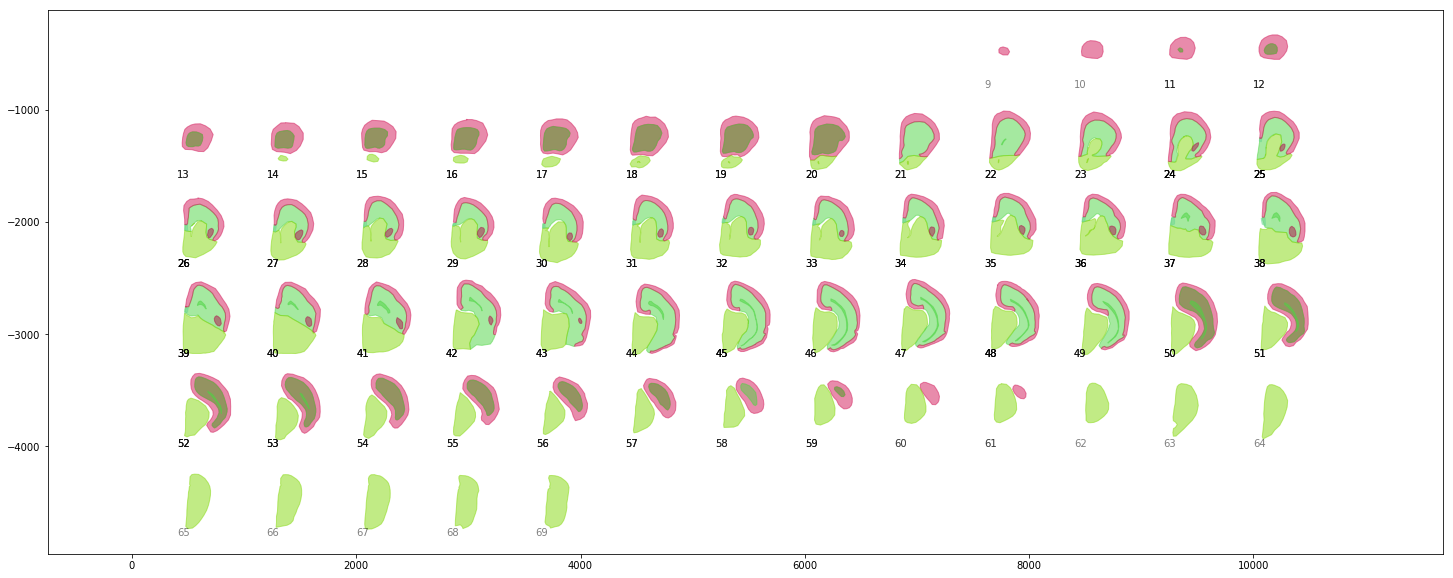

In [48]:
# Draw regions, save them as SVG
path = RAWSEG_DIR + "/p4_slices.svg"
if not os.path.exists(RAWSEG_DIR):
    os.makedirs(RAWSEG_DIR)
mic.draw_all_dataset(p4_slices,path=path)